<a href="https://colab.research.google.com/github/MMRES-PyBootcamp/MMRES-python-bootcamp2022/blob/main/07_misophonia_I.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Session 7 - Misophonia (First part)
> Misophonia is a recently described neurological condition whereby patients feel strong anxiety when hearing particular noises (someone blowing their nose, mobile ringing, trains passing, etc..). It is believed that 5% of the population suffers from this condition without knowing it, likely blaming their anxiety on other causes.

The misophonia dataset is from a recent (unpublished) study that aimed to describe the relationships between misophonia and anxiety, depression, and cephalometric measures (shape of the jaw).

<div class="alert alert-block alert-success"><b>Practice:</b> Practice cells announce exercises that you should try during the current boot camp session.
</div>

<div class="alert alert-block alert-warning"><b>Extension:</b> Extension cells correspond to exercises (or links to contents) that are a bit more advanced. We recommend to try them after the current boot camp session.
</div>

<div class="alert alert-block alert-info"><b>Tip:</b> Tip cells just give some advice or complementary information.
</div>

<div class="alert alert-block alert-danger"><b>Caveat:</b> Caveat cells warn you about the most common pitfalls one founds when starts his/her path learning Python.

</div>

**This document is devised as a tool to enable your self-learning process. If you get stuck at some step or need any kind of help, please don't hesitate to raise your hand and ask for the teacher's guidance.**

---

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Data loading

Let's begin again by loading Pandas with the `pd` alias and by importing the misophonia dataset `misophonia_data.xlsx` from the `/MMRES-python-bootcamp2022/datasets` sub-folder:

In [9]:
# Load package with its corresponding alias
import pandas as pd
pd.set_option('display.max_columns', None)

# Reading an Excel SpreadSheet and storing it in as a DataFrame called `df`
# df = pd.read_excel('https://github.com/MMRES-PyBootcamp/MMRES-python-bootcamp2022/blob/main/datasets/misophoinia_data.xlsx?raw=true')
df = pd.read_excel('https://github.com/MMRES-PyBootcamp/MMRES-python-bootcamp2024/raw/master/datasets/misophonia_data.xlsx')

# Return the DataFrame
df


,Misofonia,Misofonia.dic,Estado,Estado.dic,ansiedad.rasgo,ansiedad.rasgo.dic,ansiedad.estado,ansiedad.estado.dic,ansiedad.medicada,ansiedad.medicada.dic,depresion,depresion.dic,Sexo,Edad,CLASE,Angulo_convexidad,protusion.mandibular,Angulo_cuelloYtercio,Subnasal_H,cambio.autoconcepto,Misofonia.post,Misofonia.pre,ansiedad.dif
0,si,4.0,divorciado,2.0,99.0,1.0,99.0,1.0,no,0.0,33.65,1.0,M,44.0,III,7.97,13.0,89.6,1.5,1.0,21.0,14.0,0.0
1,si,2.0,casado,1.0,75.0,1.0,75.0,1.0,no,0.0,19.77,0.0,M,43.0,II,18.23,-5.0,107.2,7.3,0.0,14.0,13.0,0.0
2,no,0.0,divorciado,2.0,77.0,1.0,55.0,0.0,no,0.0,29.57,0.0,M,24.0,I,12.27,11.5,101.4,5.0,NaN,NaN,NaN,-22.0
3,si,3.0,casado,1.0,95.0,1.0,99.0,1.0,no,0.0,1.40,0.0,M,33.0,III,7.81,16.8,75.3,2.7,1.0,NaN,NaN,4.0
4,no,0.0,casado,1.0,30.0,0.0,40.0,0.0,no,0.0,5.98,0.0,H,41.0,I,9.81,33.0,105.5,6.0,NaN,NaN,NaN,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,15.0,NaN
134,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.0,12.0,NaN
135,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.0,18.0,NaN
136,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.0,14.0,NaN


<div class="alert alert-block alert-warning"><b>Extension:</b>

We can load data from different file formats. Export the current dataset as a *.csv file, or as a *.tsv file and load it again using the proper function. You will have to find them in the documentation:

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_csv.html

https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html
</div>

<div class="alert alert-block alert-info"><b>Tip:</b> 
Uncomment the following cell to have an example
</div> 

In [ ]:

#df = pd.read_csv('https://raw.githubusercontent.com/MMRES-PyBootcamp/MMRES-python-bootcamp2022/main/datasets/misophoinia_data.mod.csv', sep=',', na_values="NA")
#df


### Data description

Here is the description of the variables

[1] “Misofonia”: Binary (si: misophinic, no: no misophinic)

[2] “Misofonia.dic”: Categorical (0: no misophinic, 1: severity 1, 2: severity 2, 3: severity 3, 4: severity 4)

[3] “Estado”: Marital status (casado: married, soltero: single, viuda: widow, divorciado:divorced)

[4] “Estado.dic”: Numeric Marital status

[5] “ansiedad.rasgo”: Score from 0-100 with anxiety personality trait

[6] “ansiedad.rasgo.dic”: Binary score (0,1) of anxiety personality trait

[7] “ansiedad.estado”: Score from 0-100 with current state of anxiety

[8] “ansiedad.estado.dic”: Binary score (0,1) with current state of anxiety

[9] “ansiedad.medicada”: Diagnosed with anxiety disorder (si, no)

[10] “ansiedad.medicada.dic”: Diagnosed with anxiety disorder (1, 0)

[11] “depresion”: Score from 0-50 with current state of depression

[12] “depresion.dic” : Binary score (0,1) with current state of depression

[13] “Sexo”: Male=H, Female:M

[14] “Edad”: Age

[15] “CLASE”: Type of jaw

[16] “Angulo_convexidad”: convexity angle

[17] “protusion.mandibular”: Projection of the jaw [18] “Angulo_cuelloYtercio”: angle between jaw and neck [19] “Subnasal_H”: Nasal angle

[20] “cambio.autoconcepto”: Whether people changed their self-concept after treatment.

[21] “Misofonia.post”: Misophionia diagnosed (A-MISO) after an educational program, where patients were made aware of a condition called misophonia.

[22] “Misofonia.pre”: Misophionia diagnosed (A-MISO) before an educational program, where patients were made aware of a condition called misophonia

[23] “ansiedad.dif”: Difference between anxiety state and anxiety trait scores

<br><br>

When reporting the results of a study, we first describe the variables of interest in tables and figures.

We describe demographics (sex, age, marital status, etc..)

We describe outcome variables (misophonia)

### 1. Descriptive statistics of explanatory variables


We describe explanatory variables such as cephalometric measures, anxiety, depression, etc.


<div class="alert alert-block alert-success"><b>Practice:</b>

Imagine we want to study the anxiety of participants in the misophonia study. Once loaded the data, describe the participants’ sex, age and marital status. 
</div>


In [10]:
# Count the numnber of occurences of each value in a categorical variable
from collections import Counter
print(Counter(df['Sexo']))


Counter({1.0: 64, 0.0: 29, 2.0: 26, 3.0: 4, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1})


In [12]:

# this is the same using pandas
df.groupby('Sexo').size()


Sexo
H    45
M    78
dtype: int64

In [13]:
# this way we can get the percentages
df['Sexo'].value_counts(normalize=True) * 100

Sexo
M    63.414634
H    36.585366
Name: proportion, dtype: float64

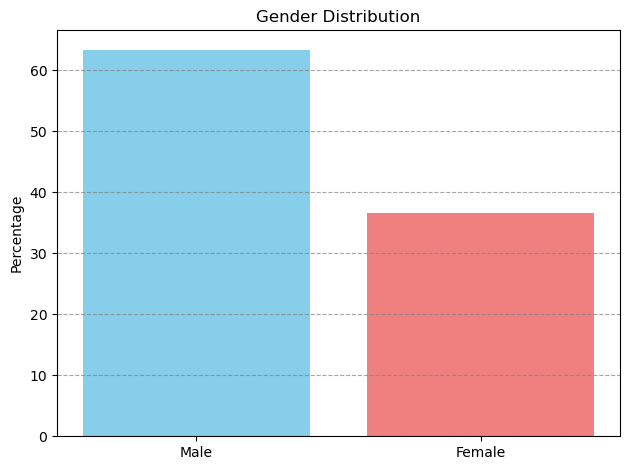

In [15]:
# plot the percentage using matplotlib

fig, ax = plt.subplots()
percentages = df['Sexo'].value_counts(normalize=True) * 100
ax.bar(percentages.index, percentages, color=['skyblue', 'lightcoral'])
ax.set_xticks([0, 1])
ax.set_xticklabels(['Male', 'Female'])
ax.set_ylabel('Percentage')
ax.set_title('Gender Distribution')
ax.yaxis.grid(True, linestyle='--', which='both', color='gray', alpha=0.7)
plt.tight_layout()

<Axes: xlabel='Sexo', ylabel='count'>

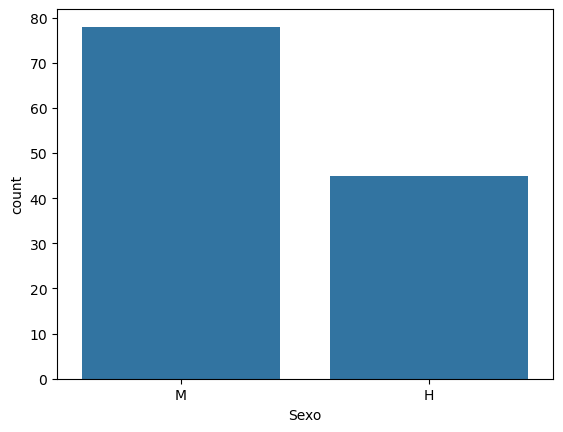

In [16]:
# plot the counts using seaborn
fig, ax = plt.subplots()
sns.countplot(data=df,x='Sexo')

In [17]:
#mean with pandas
df['Edad'].mean()

43.9349593495935

In [18]:
#mean with numpy
np.mean(df['Edad'])

43.9349593495935

In [19]:
#standard deviation with numpy
np.std(df['Edad'])

14.128757410825528

In [20]:
#standard deviation with pandas
df['Edad'].std()

14.186543980874442

In [22]:
df.describe()


,Misofonia.dic,Estado.dic,ansiedad.rasgo,ansiedad.rasgo.dic,ansiedad.estado,ansiedad.estado.dic,ansiedad.medicada.dic,depresion,depresion.dic,Edad,Angulo_convexidad,protusion.mandibular,Angulo_cuelloYtercio,Subnasal_H,cambio.autoconcepto,Misofonia.post,Misofonia.pre,ansiedad.dif
count,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,82.000000,82.000000,82.000000,123.000000
mean,1.691057,1.040650,68.772358,0.658537,67.853659,0.666667,0.081301,17.856179,0.186992,43.934959,10.198943,13.328049,93.722764,3.563659,1.231707,14.975610,12.256098,-0.918699
std,1.355802,0.761775,29.044571,0.476140,29.664706,0.473333,0.274414,11.738407,0.391500,14.186544,5.086707,16.739341,12.211918,3.217642,1.125449,3.819946,5.514987,12.866014
min,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.250000,0.000000,13.000000,-1.000000,-30.000000,56.000000,-6.700000,0.000000,5.000000,0.000000,-45.000000
25%,0.000000,1.000000,60.000000,0.000000,45.000000,0.000000,0.000000,8.445000,0.000000,34.000000,7.020000,3.650000,84.950000,2.200000,0.000000,12.250000,10.000000,-8.000000
50%,2.000000,1.000000,80.000000,1.000000,77.000000,1.000000,0.000000,15.460000,0.000000,43.000000,7.960000,12.200000,92.000000,2.900000,1.000000,14.000000,13.000000,0.000000
75%,3.000000,1.000000,89.000000,1.000000,90.000000,1.000000,0.000000,27.370000,0.000000,53.000000,14.225000,21.700000,105.150000,6.300000,2.000000,18.000000,16.750000,8.000000
max,4.000000,3.000000,99.000000,1.000000,99.000000,1.000000,1.000000,44.000000,1.000000,86.000000,21.300000,92.000000,119.000000,9.800000,5.000000,21.000000,20.000000,37.000000


<div class="alert alert-block alert-success"><b>Practice:</b>

Try to obtain the descriptive statistics shown above with the individual functions of numpy and/or pandas.
 
</div>

<Axes: xlabel='Edad', ylabel='Count'>

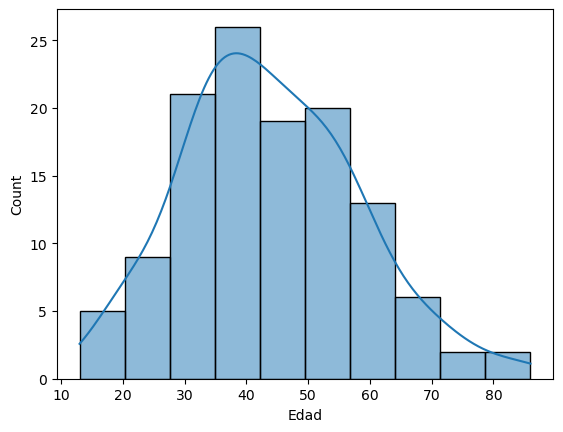

In [23]:
# histogram
sns.histplot(df['Edad'], kde=True)


<Axes: ylabel='Edad'>

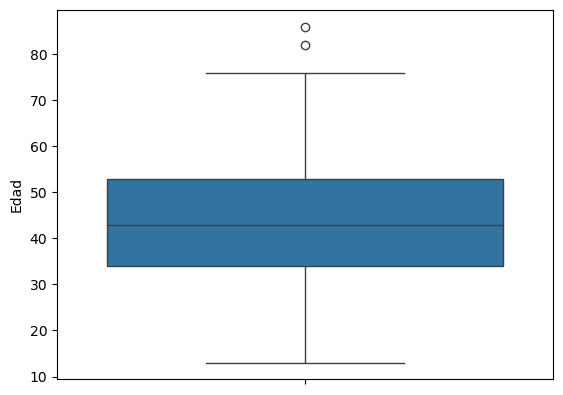

In [24]:
sns.boxplot(y=df['Edad'])

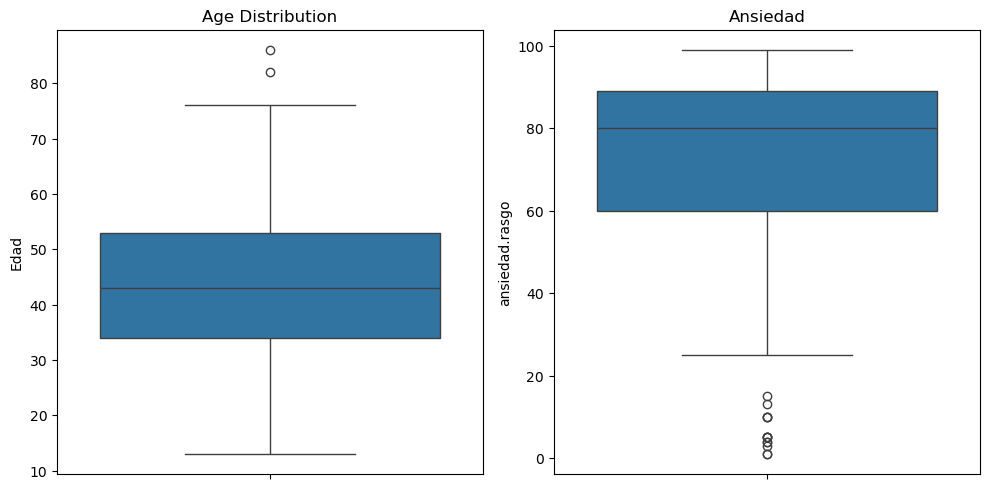

In [32]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

sns.boxplot(data=df, y='Edad', ax=ax1)
ax1.set_title('Age Distribution')

sns.boxplot(data=df, y='ansiedad.rasgo', ax=ax2)
ax2.set_title('Ansiedad')

plt.tight_layout()
plt.show()

In [33]:
# Age by sex
maleage = df[df['Sexo']=="H"]['Edad']
femaleage = df[df['Sexo']=="M"]['Edad']
print('male age\n',maleage.describe())
print('female age\n',femaleage.describe())

male age
 count    45.000000
mean     40.644444
std      10.751650
min      19.000000
25%      34.000000
50%      41.000000
75%      48.000000
max      69.000000
Name: Edad, dtype: float64
female age
 count    78.000000
mean     45.833333
std      15.583388
min      13.000000
25%      33.250000
50%      44.000000
75%      56.500000
max      86.000000
Name: Edad, dtype: float64


<Axes: xlabel='Sexo', ylabel='Edad'>

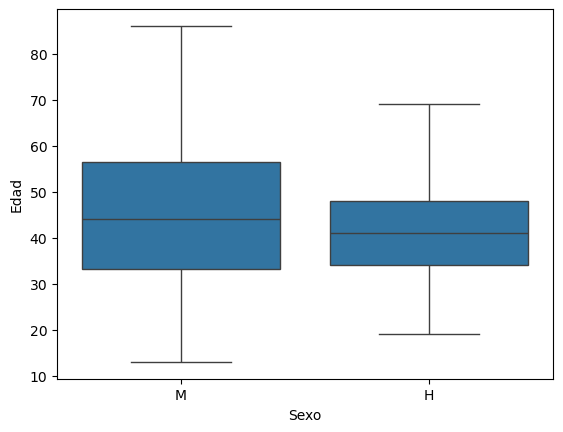

In [34]:
sns.boxplot(data=df,y='Edad', x='Sexo')

In [35]:
# Marital status:
maritaldf=df['Estado'].value_counts(normalize=True) * 100
maritaldf

Estado
casado        52.032520
soltero       23.577236
divorciado    21.138211
viuda          3.252033
Name: proportion, dtype: float64

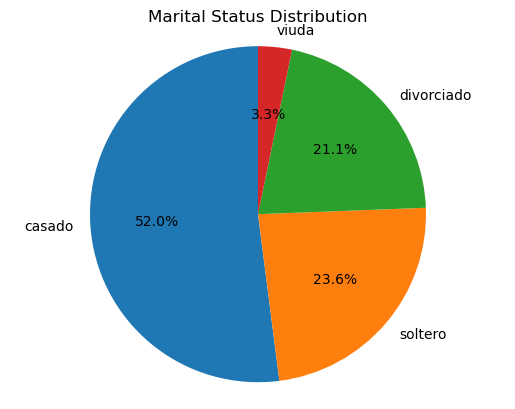

In [37]:
fig, ax = plt.subplots()
ax.pie(maritaldf, labels=maritaldf.index, autopct='%1.1f%%', startangle=90)
ax.set_title('Marital Status Distribution')
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

### 2. Descriptive statistics of clinical outcome

We have four measures of anxiety:
<ul>
  <li> ansiedad.rasgo (are you an anxious person?) continuous:0-100 </li>
  <li> ansiedad.estado (are you currently feeling anxious?) continuous:0-100 </li>
  <li> ansiedad.medicada (have you been diagnosed with an anxiety disorder?) binary (si, no) </li>
  <li> ansiedad.dif (difference between ansiedad.estado and ansiedad.rasgo) </li>
</ul>

#### Anxiety trait 
are you an anxious person?
continuous:0-100

In [38]:
df['ansiedad.rasgo'].describe()

count    123.000000
mean      68.772358
std       29.044571
min        1.000000
25%       60.000000
50%       80.000000
75%       89.000000
max       99.000000
Name: ansiedad.rasgo, dtype: float64

<Axes: xlabel='ansiedad.rasgo', ylabel='Count'>

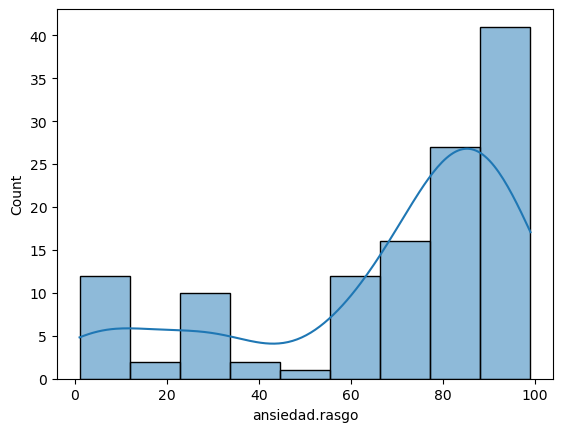

In [40]:
sns.histplot(df['ansiedad.rasgo'], kde=True)


<Axes: ylabel='ansiedad.rasgo'>

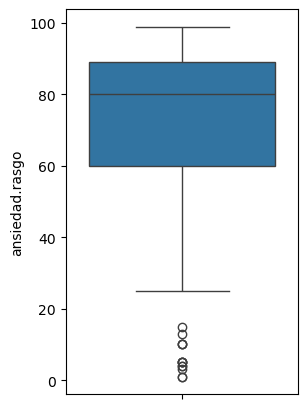

In [41]:
fig, ax = plt.subplots()
fig.set_size_inches(3, 5)
sns.boxplot(data=df,y='ansiedad.rasgo',ax=ax)

#### Anxiety state
are you currently feeling anxious? 
*continuous*:0-100

In [42]:
df['ansiedad.estado'].describe()

count    123.000000
mean      67.853659
std       29.664706
min        1.000000
25%       45.000000
50%       77.000000
75%       90.000000
max       99.000000
Name: ansiedad.estado, dtype: float64

<Axes: xlabel='ansiedad.estado', ylabel='Count'>

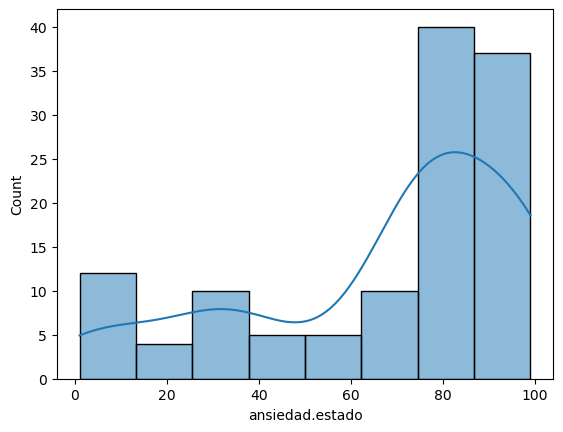

In [43]:
sns.histplot(df['ansiedad.estado'], kde=True)


<Axes: ylabel='ansiedad.estado'>

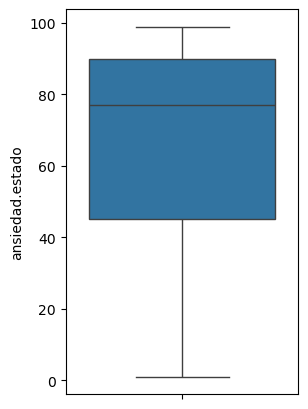

In [44]:
fig, ax = plt.subplots()
fig.set_size_inches(3, 5)
sns.boxplot(data=df,y='ansiedad.estado',ax=ax)

#### Diagnosed
have you been diagnosed with an anxiety disorder? binary (si, no)


<Axes: xlabel='ansiedad.medicada', ylabel='count'>

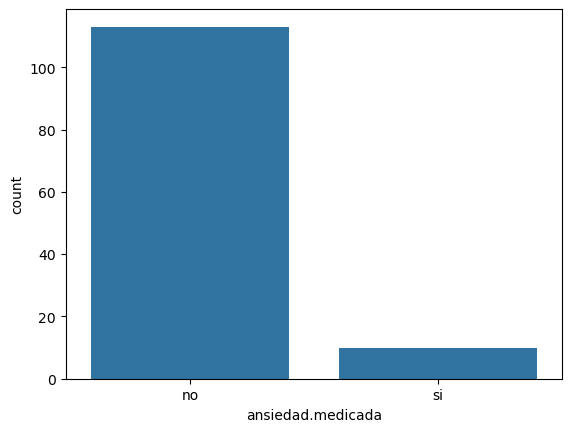

In [45]:
# plot the counts using seaborn
fig, ax = plt.subplots()
sns.countplot(data=df,x='ansiedad.medicada')

#### Relationships between outcomes

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and pos

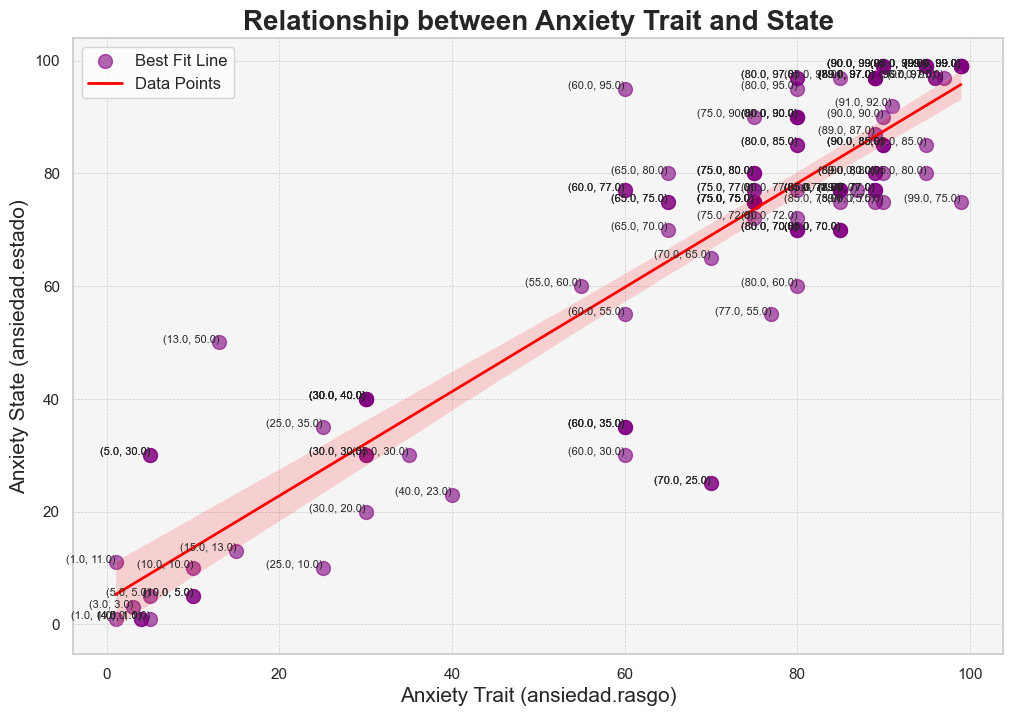

In [48]:
# Create a scatter plot with a line of best fit
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")

# Scatter plot with regression line
sns.regplot(x='ansiedad.rasgo', y='ansiedad.estado', data=df, scatter_kws={'s':100, 'alpha':0.6, 'color':'purple'}, line_kws={'color':'red', 'lw':2})

# Adding titles and labels
plt.title('Relationship between Anxiety Trait and State', fontsize=20, weight='bold')
plt.xlabel('Anxiety Trait (ansiedad.rasgo)', fontsize=15)
plt.ylabel('Anxiety State (ansiedad.estado)', fontsize=15)

# Adding a background gradient
ax = plt.gca()
ax.set_facecolor('#f5f5f5')

# Adding a grid
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Adding annotations
for i in range(len(df)):
    plt.text(df['ansiedad.rasgo'][i], df['ansiedad.estado'][i], f'({df["ansiedad.rasgo"][i]}, {df["ansiedad.estado"][i]})', fontsize=8, ha='right')

# Adding a legend
plt.legend(['Best Fit Line', 'Data Points'], loc='upper left', fontsize=12)

# Display the plot
plt.show()


<Axes: xlabel='ansiedad.rasgo', ylabel='ansiedad.estado'>

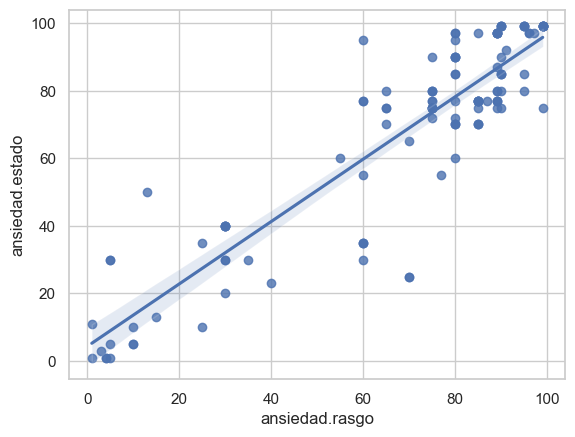

In [49]:
sns.regplot(data=df,x='ansiedad.rasgo',y='ansiedad.estado')

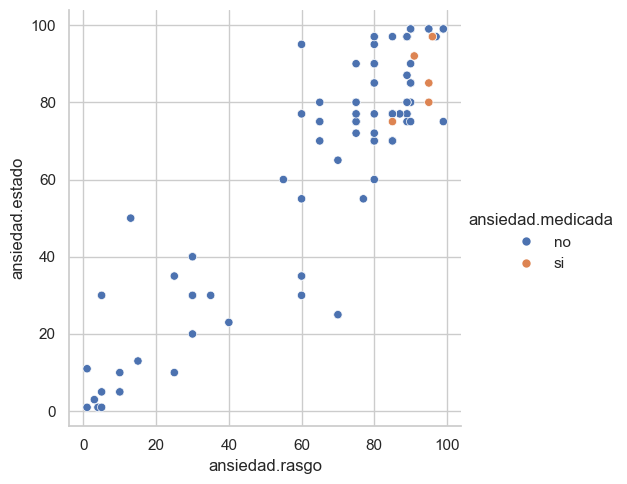

In [50]:
sns.relplot(data=df,x='ansiedad.rasgo',y='ansiedad.estado',hue='ansiedad.medicada')

#### Relationships between explanatory and outcome variables

<Axes: xlabel='ansiedad.medicada', ylabel='Edad'>

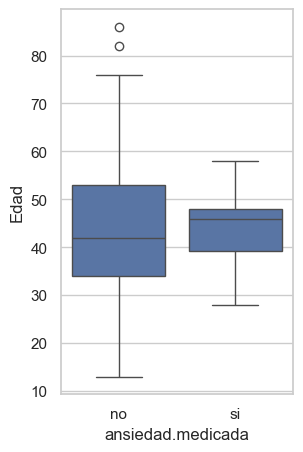

In [51]:
# Trait by sex
fig, ax = plt.subplots()
fig.set_size_inches(3, 5)
sns.boxplot(data=df, x='ansiedad.medicada', y='Edad',ax=ax)

<Axes: xlabel='Sexo', ylabel='ansiedad.estado'>

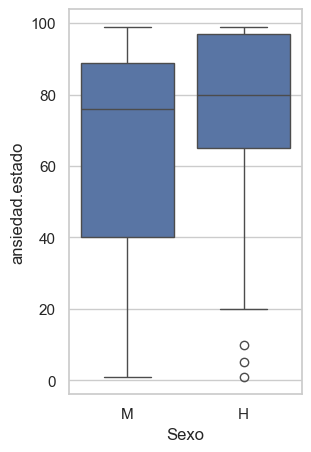

In [52]:
# State by sex
fig, ax = plt.subplots()
fig.set_size_inches(3, 5)
sns.boxplot(data=df, x='Sexo', y='ansiedad.estado', ax=ax)

<Axes: xlabel='Sexo', ylabel='ansiedad.estado'>

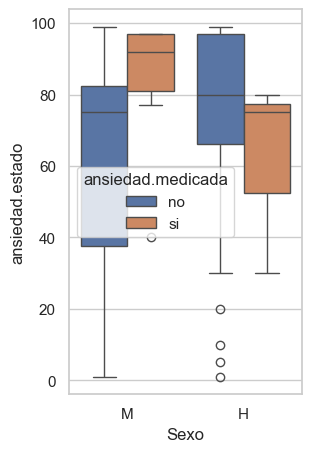

In [55]:
# Diagnosed by sex
# State by sex
fig, ax = plt.subplots()
fig.set_size_inches(3, 5)
sns.boxplot(data=df, x='Sexo', y='ansiedad.estado', hue='ansiedad.medicada', ax=ax)

<Axes: xlabel='ansiedad.medicada', ylabel='proportion'>

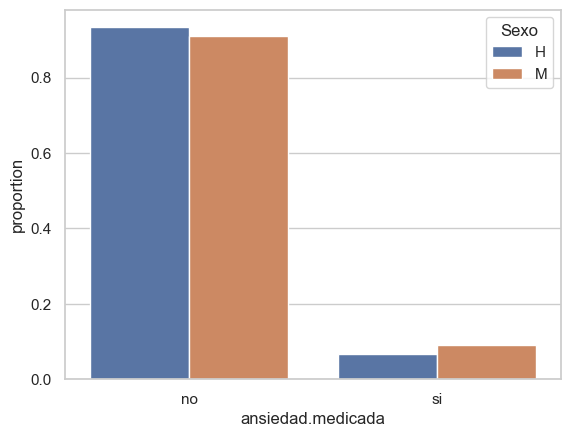

In [56]:
# plot the percentages using seaborn

x, y, hue = "ansiedad.medicada", "proportion", "Sexo"
hue_order = ["M", "H"]

(df[x]
 .groupby(df[hue])
 .value_counts(normalize=True)
 .rename(y)
 .reset_index()
 .pipe((sns.barplot, "data"), x=x, y=y, hue=hue))

In [57]:
#conditional frequencies by sex
pd.crosstab(df['Sexo'],df['ansiedad.medicada'],normalize='index')


ansiedad.medicada,no,si
Sexo,,
H,0.933333,0.066667
M,0.910256,0.089744


<Axes: xlabel='Edad', ylabel='ansiedad.rasgo'>

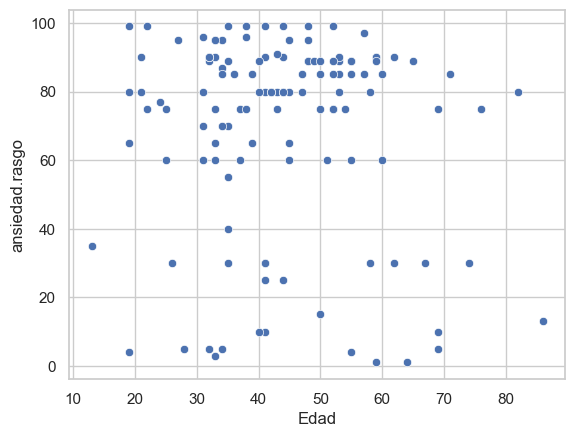

In [59]:
#Trait Vs age
sns.scatterplot(df, x="Edad", y='ansiedad.rasgo')

<Axes: xlabel='Edad', ylabel='ansiedad.estado'>

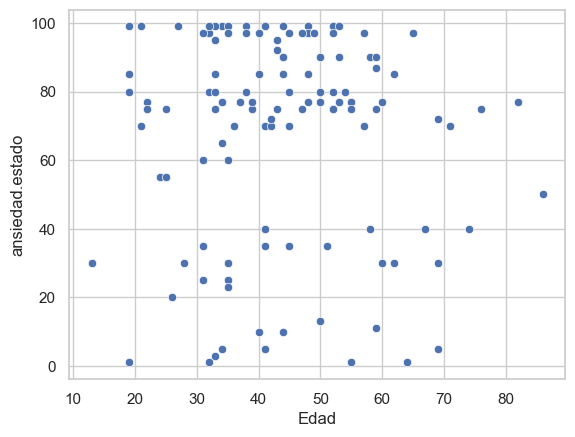

In [61]:
# State Vs age
sns.scatterplot(x=df['Edad'], y=df['ansiedad.estado'])


<Axes: xlabel='ansiedad.medicada', ylabel='Edad'>

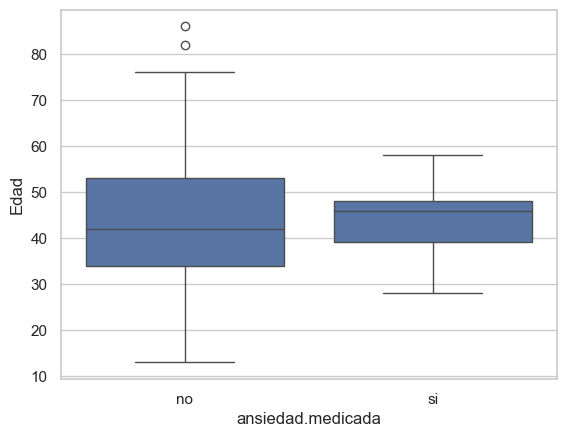

In [62]:
#age by diagnosis
sns.boxplot(data=df,y='Edad',x='ansiedad.medicada')